In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#import data 
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')
print(observations.head())
print(species.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole     No Intervention  
1                              American Bison, Bison     No Intervention  
2  Aurochs, Aurochs, Domestic 

In [5]:
#shape of the data and columns 
print("Shape of observations:", observations.shape)
print("Columns of observations:", observations.columns)
print("Shape of species:", species.shape)
print("Columns of species:", species.columns)

Shape of observations: (23296, 3)
Columns of observations: Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Shape of species: (5824, 4)
Columns of species: Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [6]:
#Lets dig a little deeper in the observations data 
print(observations.nunique())
print(observations.park_name.unique())
print("total observations:", observations.observations.sum())

scientific_name    5541
park_name             4
observations        304
dtype: int64
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
total observations: 3314739


in the data wrangler i can see that in the species_info that there are alot of missing values in the conservation_status  columns probably indicating that they there not in danger or threaten  or in recovery, those missing values can be filled with something like, "not in danger", or "no intervention" or "safe". im going to fill those  ones with "No Intervention" in the using the data wrangler. 

In [7]:
species.groupby("conservation_status").size()


conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

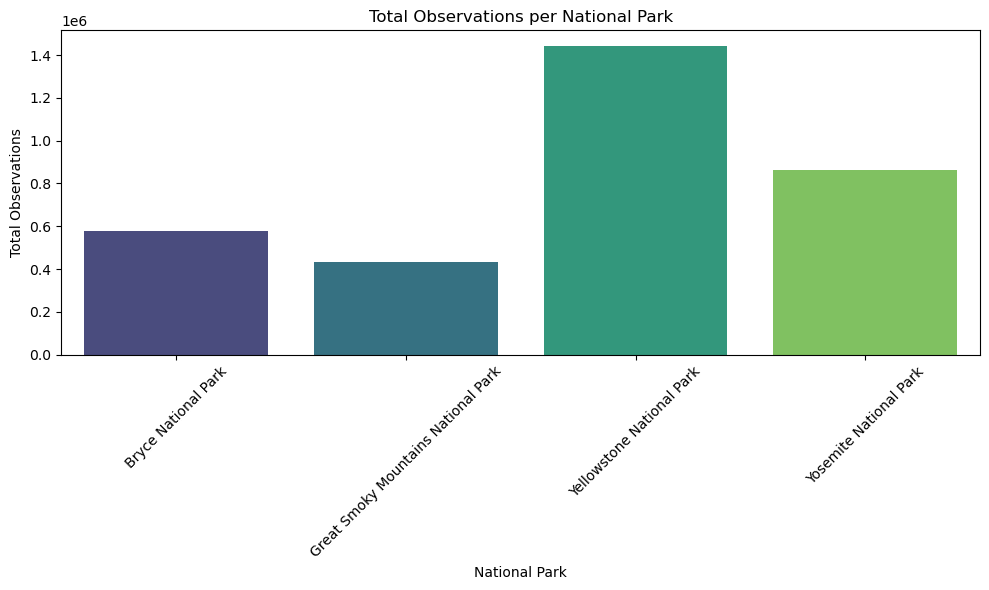

In [17]:
observations_by_park = observations.groupby('park_name')['observations'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='park_name', y='observations', data=observations_by_park, palette='viridis')
plt.title('Total Observations per National Park')
plt.xlabel('National Park')
plt.ylabel('Total Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
conservation_category = species[species.conservation_status != "No Intervention"] \
    .groupby(["conservation_status", "category"])['scientific_name'] \
    .count() \
    .unstack()

conservation_category



category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


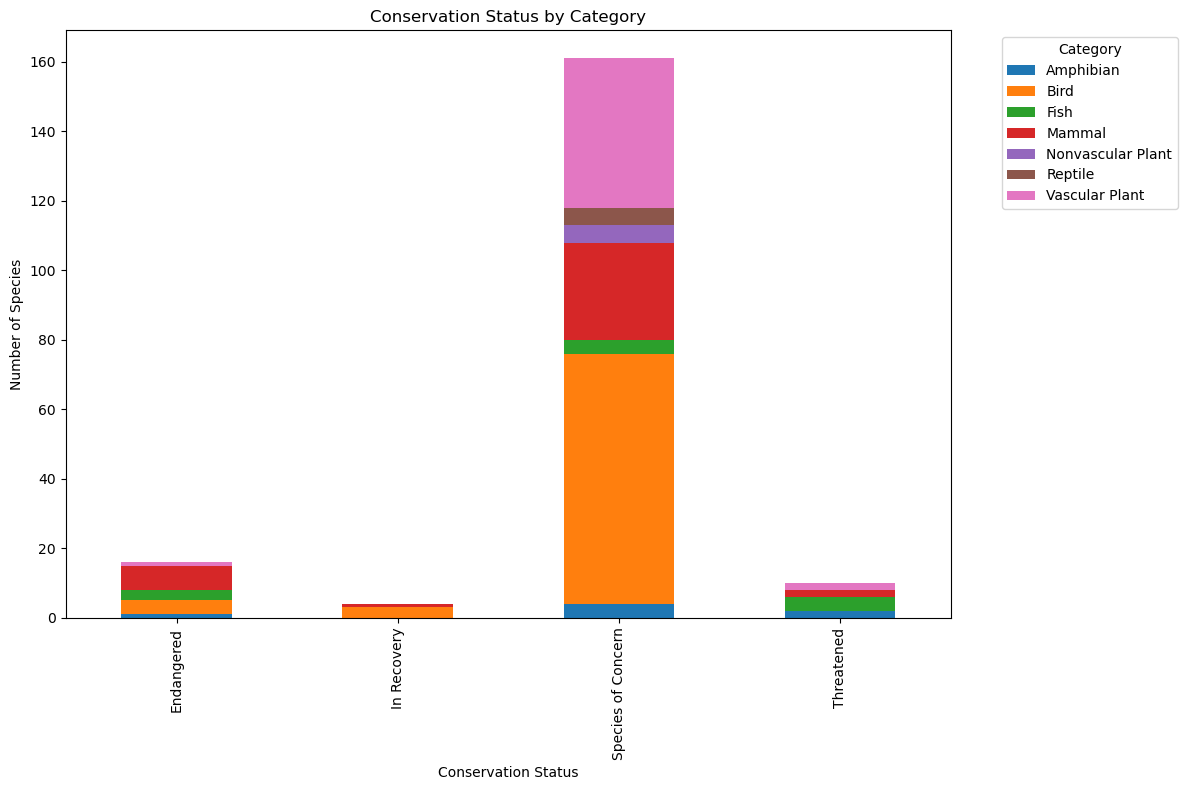

In [16]:
conservation_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Conservation Status by Category')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [20]:
merged_data = pd.merge(species, observations, on='scientific_name')
print(merged_data.head())
merged_data.to_csv('merged_data.csv', index=False)


  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0     No Intervention                  Bryce National Park           130  
1     No Intervention            Yellowstone National Park           270  
2     No Intervention  Great Smoky Mountains National Park            98  
3     No Intervention               Yosemite National Park           117  
4     No Intervention               Yosemite National Park           128  
